In [1]:
from datetime import datetime
import os
from time_utils.gpst import dt2gpst, gpst2dt, gpst_week_number, gpst_week_day

import zipfile
import tarfile
import gzip
import shutil

from ftplib import FTP
from os.path import basename, dirname, join, exists
from os import makedirs

import matplotlib.pyplot as plt

from ftplib import FTP
from os.path import basename, dirname, join, exists
from os import makedirs

In [2]:
import zipfile
import tarfile

import gzip
import shutil

rarfile = None
try:
    import rarfile
except ImportError:
    msg = '`rarfile` package not found.  ".rar" file decompression will not be available'
    print(msg)
    #raise ImportError(msg)

from os.path import dirname, join, basename
import subprocess

`rarfile` package not found.  ".rar" file decompression will not be available


In [3]:
from RINEX2Helper import format_filepath

`rarfile` package not found.  ".rar" file decompression will not be available


In [4]:
from RINEX2Helper import ftp_download

In [5]:
import zipfile
import tarfile

import gzip
import shutil

rarfile = None
try:
    import rarfile
except ImportError:
    msg = '`rarfile` package not found.  ".rar" file decompression will not be available'
    print(msg)
    #raise ImportError(msg)

from os.path import dirname, join, basename
import subprocess

`rarfile` package not found.  ".rar" file decompression will not be available


In [6]:
from RINEX2Helper import fix_bad_zip_file

In [7]:
from RINEX2Helper import decompress

In [17]:
from rinex2 import parse_RINEX2_obs_file

In [18]:
for day in range(21, 25):
    ftp_host = 'cddis.gsfc.nasa.gov'
    filepath_template = \
        'pub/gps/data/daily/{yyyy}/{ddd}/{yy}o/nist{ddd}0.{yy}o.Z'
    url_filepath = format_filepath(filepath_template, datetime(2017, 8, day))
    filepath = os.path.join('/Users/liuzijun 1/Projects/gnss-research/data/rinex/', url_filepath)
    if not os.path.exists(os.path.dirname(filepath)):
        os.makedirs(os.path.dirname(filepath))
    if not os.path.exists(filepath):
        success = ftp_download(ftp_host, url_filepath, filepath)
    subprocess.call('uncompress -f ' + filepath.replace(' ', '\ '), shell=True)
    filepath = filepath[:-2]

In [19]:
def download_and_decompress(station_id, dt, overwrite=False):
    ftp_host = 'cddis.gsfc.nasa.gov'
    filepath_template = 'pub/gps/data/daily/{yyyy}/{ddd}/{yy}o/{station_id}{ddd}0.{yy}o.Z'
    rinex_dir = '/Users/liuzijun 1/Projects/gnss-research/data/rinex/'
    url_filepath = format_filepath(filepath_template, dt, params={'station_id': station_id})
    filepath = os.path.join(rinex_dir, url_filepath)
    if not os.path.exists(os.path.dirname(filepath)):
        os.makedirs(os.path.dirname(filepath))
    if overwrite or (not os.path.exists(filepath) and not os.path.exists(filepath[:-2])):
        success = ftp_download(ftp_host, url_filepath, filepath)
    if overwrite or (os.path.exists(filepath) and not os.path.exists(filepath[:-2])):
        subprocess.call('uncompress -f ' + filepath.replace(' ', '\ '), shell=True)
    filepath = filepath[:-2]
    return filepath 

In [20]:
def plot_and_save(time, satellite, plot_filepath):
    index = satellite['index']
    
    c = 299792458
    kappa = 40.308
    fL1 = 1.57542e9
    fL2 = 1.2276e9
    
    P1 = satellite['L1']['pseudorange']
    P2 = satellite['L2']['pseudorange']
    TEC = (P1 - P2) / (kappa * (1 / fL1**2 - 1 / fL2**2))
    
    L1 = satellite['L1']['carrier'] * c / fL1
    L2 = satellite['L2']['carrier'] * c / fL2
    TEC_rel = -(L1 - L2) / (kappa * (1 / fL1**2 - 1 / fL2**2))
    
    
    fig = plt.figure(figsize=(12, 7))
    ax = fig.add_subplot(111)
    t = time[index] - time[0]
    ax.scatter(t / 3600, TEC)
    ax.scatter(t / 3600, TEC_rel)
    ax.set_ylabel('[TECu]')
    ax.set_xlabel('Time [hr]')

    plt.savefig(plot_filepath)
    plt.close()

In [21]:
for day in range(21, 25):
    dt = datetime(2017, 8, day)
    station_id = 'nist'
    filepath = download_and_decompress(station_id, dt)
    header, observations = parse_RINEX2_obs_file(filepath)
    satellites = observations['satellites']
    time = observations['time']
    sat_ids = satellites.keys()
    for sat_id in sat_ids:
        plot_filename = '{0:04}{1:02}{2:02}_{3}_TEC-plot.png'.format(dt.year, dt.month, dt.day, sat_id)
        plot_dir = '/Users/liuzijun 1/Projects/gnss-research/plots'
        if not os.path.exists(plot_dir):
            os.makedirs(plot_dir)
        plot_filepath = os.path.join(plot_dir, plot_filename)
#         print(plot_filepath)
        try:
            plot_and_save(time, satellites[sat_id], plot_filepath)
        except Exception as e:
            print(e)

operands could not be broadcast together with shapes (966,) (965,) 
operands could not be broadcast together with shapes (947,) (946,) 
operands could not be broadcast together with shapes (889,) (888,) 


In [22]:
!du -hs "{plot_dir}"

3.0M	/Users/liuzijun 1/Projects/gnss-research/plots


In [23]:
from datetime import timedelta

In [24]:
from rinex2 import parse_RINEX2_obs_file

NameError: name 'sat' is not defined

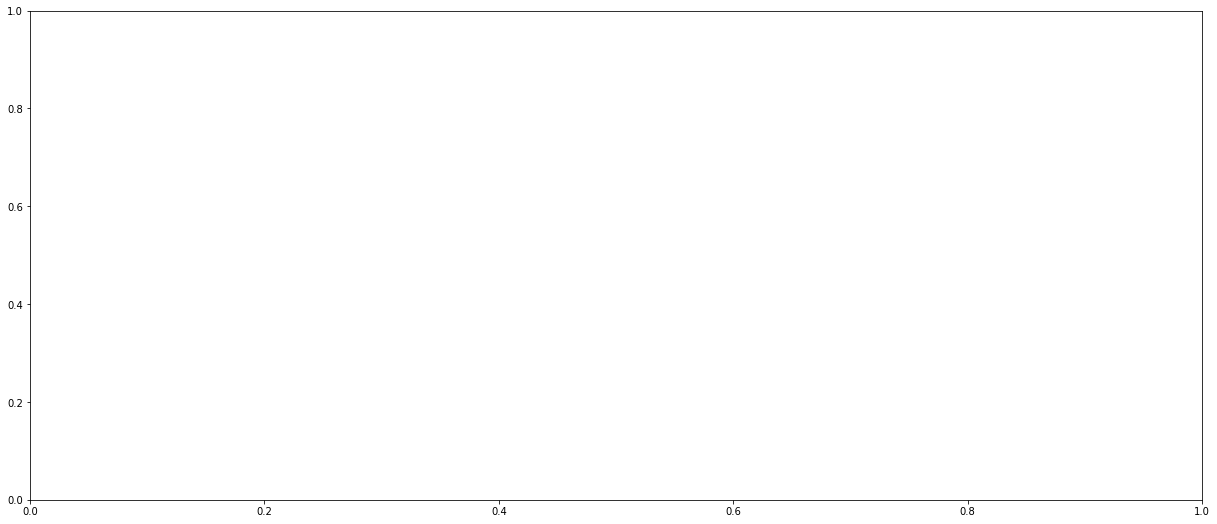

In [25]:
fig = plt.figure(figsize=(21, 9))
ax = fig.add_subplot(111)
time = observations['time'][sat['index']]
time -= time[0]
ax.scatter(time / 3600, sat['L1']['pseudorange'])
ax.set_ylabel('Pseudorange [m]')
ax.set_xlabel('Time [hr]')
plt.show()

In [ ]:
fig = plt.figure(figsize=(21, 9))
ax = fig.add_subplot(111)
time = observations['time'][sat['index']]
time -= time[0]
ax.scatter(time / 3600, sat['L1']['carrier'])
ax.set_ylabel('Carrier [m]')
ax.set_xlabel('Time [hr]')
plt.show()

In [ ]:
from scipy.constants import c

In [ ]:
kappa = 40.308
fL1 = 1.57542e9
fL2 = 1.2276e9
P1 = sat['L1']['pseudorange']
P2 = sat['L2']['pseudorange']
TEC = (P1 - P2) / (kappa * (1 / fL1**2 - 1 / fL2**2))

L1 = sat['L1']['carrier'] * c / fL1
L2 = sat['L2']['carrier'] * c / fL2
TEC_rel = -(L1 - L2) / (kappa * (1 / fL1**2 - 1 / fL2**2))

In [ ]:
fig = plt.figure(figsize=(21, 9))
ax = fig.add_subplot(111)

time = observations['time'][sat['index']]
time -= time[0]
ax.scatter(time / 3600, TEC)
ax.scatter(time / 3600, TEC_rel)
ax.set_ylabel('TEC')
ax.set_xlabel('Time [hr]')
ax.grid()
plt.show()